## Import necessary packages and define the Charuco Board

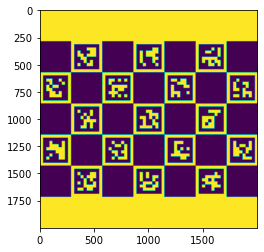

In [1]:
import numpy as np
from cv2 import aruco
import matplotlib.pyplot as plt
import cv2
import os
import imageio
from PIL import Image, ImageEnhance, ImageOps
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d
import scipy
import pandas as pd

#ChAruco board variables
CHARUCOBOARD_ROWCOUNT = 5
CHARUCOBOARD_COLCOUNT = 7
ARUCO_DICT = cv2.aruco.Dictionary_get(aruco.DICT_6X6_250)

#Create constants to be passed into OpenCV and Aruco methods
CHARUCO_BOARD = aruco.CharucoBoard_create(
    squaresX=CHARUCOBOARD_COLCOUNT,
    squaresY=CHARUCOBOARD_ROWCOUNT,
    squareLength=10, #mm
    markerLength=8, #mm
    dictionary=ARUCO_DICT)

size = (2000, 2000)
board_image = CHARUCO_BOARD.draw(size)
fig = plt.Figure()
image = plt.imshow(board_image)
plt.show()

## Different Input formats for visualization of Charuco Board detection

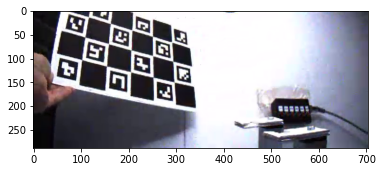

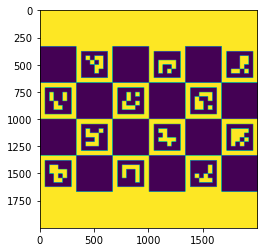

[ 1  2  3  4  5  6  7  8  9 10 11]


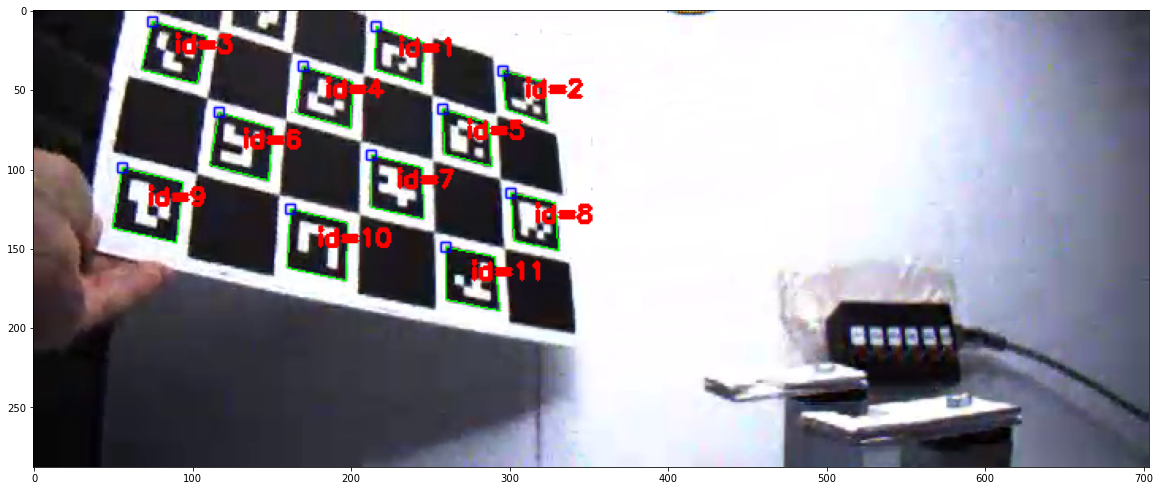

In [127]:
### load image     
#img = cv2.imread("/Users/kobel/Documents/Medizin/Doktorarbeit/Coding/Aniposelib test/Frames/Frames752.jpg", 1)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### load numpy arrays
#path = "/Users/kobel/Documents/Medizin/Doktorarbeit/Coding/Aniposelib test/Frames undistort/"
#img = np.load(path+"Frames undistortFrames752.jpg.npy")

### load single frame from video
video = imageio.get_reader("/Users/kobel/Documents/Medizin/Doktorarbeit/Coding/Aniposelib test/Charuco6X4/Calibration_220809_OTT_CalibrationSide1_6X4.mp4",  'ffmpeg')

ind = 9480
img = video.get_data(ind)

"""
# If the input videos are flipped horizontically, use the lines below
img = Image.fromarray(img)
img = img.transpose(Image.FLIP_LEFT_RIGHT)
img = np.array(img)

# If you need to increase contrast or apply kernels to your images, use the line below
img = image_preprocess(img, "sharpening")
"""

#initialize detector
parameters =  aruco.DetectorParameters_create()

#Find aruco markers in the query image
corners, ids, rej = aruco.detectMarkers(
    image=img,
    dictionary=ARUCO_DICT,
    parameters=parameters) 
print(np.unique(ids))

corners, ids, rej, recoveredIdxs = aruco.refineDetectedMarkers(image = img, board = CHARUCO_BOARD, detectedCorners = corners, detectedIds = ids, rejectedCorners= rej)

#Outline the ChAruco markers found in our image
img = aruco.drawDetectedMarkers(
    image=img, 
    corners=corners,
    ids = ids)

fig = plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()

### on at least medium-quality images, preprocessing is not necessary!

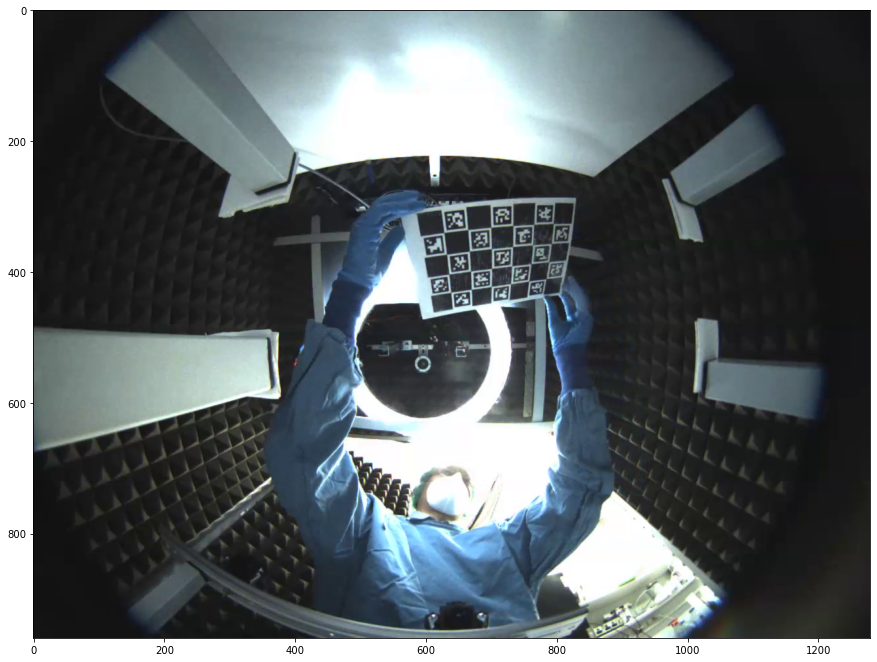

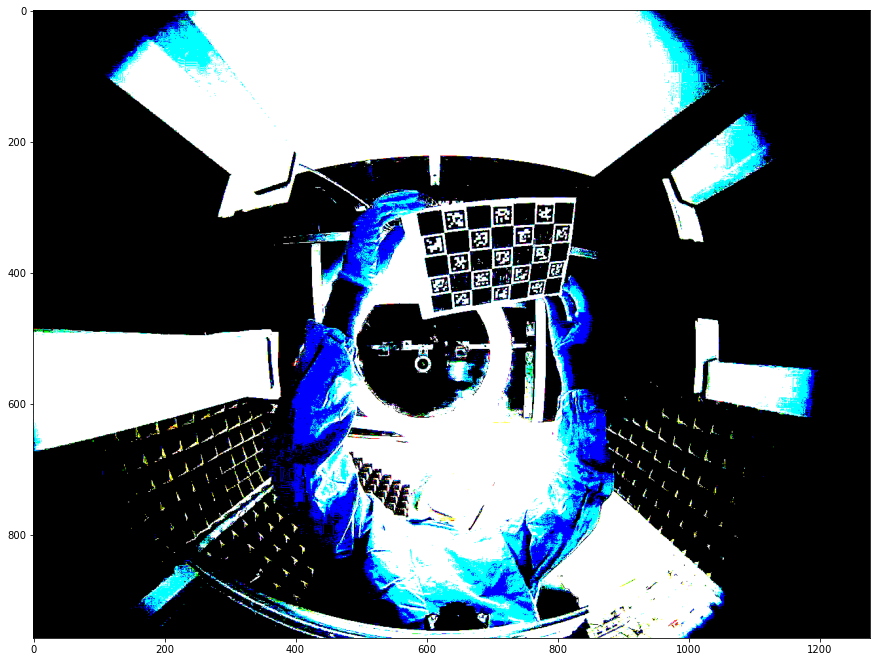

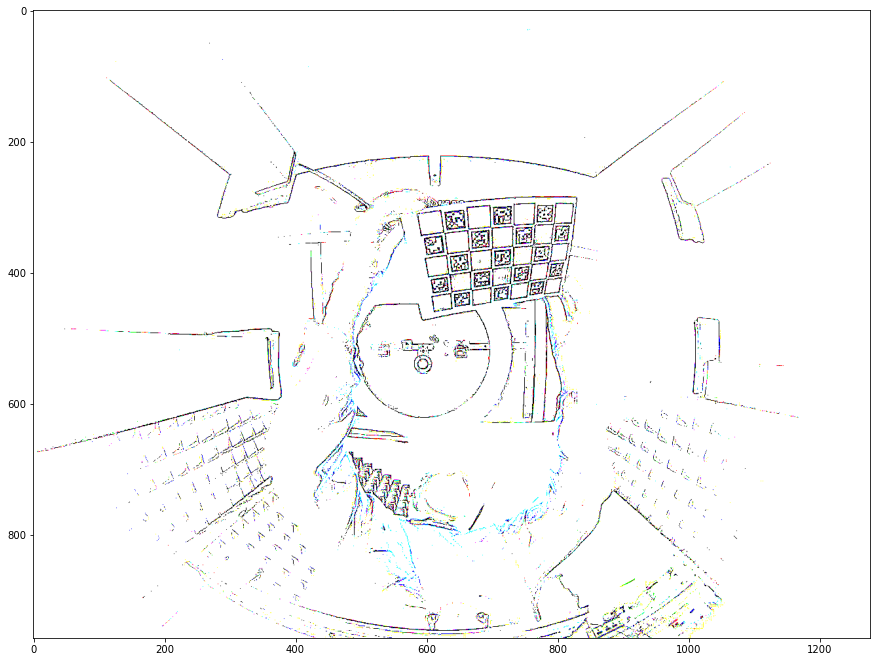

In [55]:
def image_preprocess(img, kernel_name):
    #contrast enhancement
    img = Image.fromarray(img)
    img_contr_obj=ImageEnhance.Contrast(img)
    img=img_contr_obj.enhance(2)
    img = np.array(img)
    
    
    #kernel application
    img = np.array(img)
    if kernel_name == "sharpening":
        kernel = np.array([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]])
    elif kernel_name == "edge_detection":
         kernel = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])
    
    kerneled_single_color_frames = []
    for rgb_index in range(3):
        image_convolved = convolve2d(img[:,:,rgb_index], kernel, 'valid')
        kerneled_single_color_frames.append(image_convolved)

    kerneled_frame = np.asarray(kerneled_single_color_frames)
    kerneled_frame = np.moveaxis(kerneled_frame, 0, -1)
    
    img = kerneled_frame
    
    #binarization
    mean = (img.max() + img.min())/2
    img = np.where(img < mean, img, 255) 
    img = np.where(img > mean, img, 0)
    img = img.astype("uint8")
    
    
    return img

video = imageio.get_reader("220719_test01_bottom_fisheye.mp4",  'ffmpeg')
image = video.get_data(972)
fig = plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

image = image_preprocess(image, "sharpening")
fig = plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

image = video.get_data(972)
image = image_preprocess(image, "edge_detection")
fig = plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()